In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v0')

[2017-09-18 00:53:29,084] Making new env: FrozenLake-v0


In [3]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
lr = 0.8
y = 0.95
num_episodes = 2000
rList = []

for i in range(num_episodes):
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    
    while j < 99:
        j += 1
        
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1.0/(i+1)))
        s1, r, d, _ = env.step(a)
        
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:] - Q[s,a]))
        rAll += r
        s = s1
        if d == True:
            break
        
    rList.append(rAll)

In [4]:
print("Score over time: " + str(sum(rList)/num_episodes))

Score over time: 0.003


In [5]:
print("Final Q-Table Values: ")
print(Q)

Final Q-Table Values: 
[[  8.90379478e-03   9.58104408e-03   1.73033071e-04   2.99811777e-02]
 [  2.20101116e-04   2.64026816e-03   1.47059685e-03   2.99811777e-02]
 [  2.11093495e-03   5.88133438e-03   0.00000000e+00   2.99811777e-02]
 [  0.00000000e+00   4.57509131e-03   0.00000000e+00   2.99811777e-02]
 [  2.37380122e-02   0.00000000e+00   1.85323627e-03   4.73130000e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.45345656e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.67064315e-04   3.38089636e-03   3.59578800e-03   2.05051744e-03]
 [  0.00000000e+00   4.93813912e-01   7.74071176e-03   8.52221830e-03]
 [  0.00000000e+00   1.55941235e-01   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   6.08000000e-01   0.00000000e+00  

In [6]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tf.reset_default_graph()

In [8]:
inputs1 = tf.placeholder(shape=[1,env.observation_space.n], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([env.observation_space.n, env.action_space.n], 0, 0.01))
b = tf.Variable(tf.random_uniform([1, env.action_space.n], 0, 0.01))
Q_pred = tf.matmul(inputs1,W) + b
predict = tf.argmax(Q_pred, 1)

nextQ = tf.placeholder(shape=[1, env.action_space.n], dtype=tf.float32)
loss =  tf.reduce_sum( tf.square(nextQ - Q_pred) )
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [13]:
init = tf.global_variables_initializer()

y = 0.99
e = 0.1
num_episodes = 2000

jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            j += 1
            
            a, allQ = sess.run([predict, Q_pred], feed_dict={inputs1: np.identity(16)[s:s+1]})
            
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            
            s1, r,d, _ = env.step(a[0])
            Q1 = sess.run(Q_pred, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y * maxQ1
            
            _,W1 = sess.run([updateModel, W], feed_dict={inputs1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s1
            
            if d==True:
                e = 1.0/(10 + (i/50))
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of successful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of successful episodes: 0.0325%


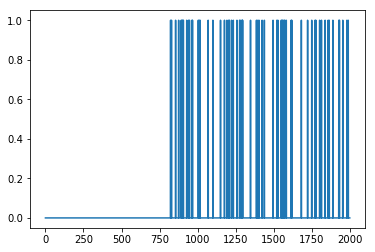

In [14]:
plt.plot(rList)

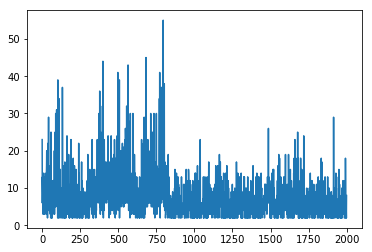

In [15]:
plt.plot(jList)